In [ ]:
#import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [ ]:

# Search word/hashtag value
consumer_key='jg5EJyI91ByAA0G9HChF9zG1E'
consumer_secret='7KP7TZ3bgWLSZVwhxowP7HPoJozfZ724vA5xRlUpyeP033oXsE'
access_token='3198857976-KDkdPbJBD1EToFgiY0HjQuAIEGLpixEP1h1dl8M'
access_token_secret='t5aypqygCgUmU1b2ffbBqpjOOQo9J6yGMlgFtSxlwldZj'


#Create the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)


search_word=input("ENTER THE HASHTAG:")
data_since=input("ENTER THE DATE:")

posts=tweepy.Cursor(api.search,q=search_word,lang="en",since=data_since).items(100)

i=1
reslt=[tweet.text for tweet in posts]


ENTER THE HASHTAG:virat kohli
ENTER THE DATE:15/08/2022


In [ ]:
#create a dataframe with a colunm called Tweets
df = pd.DataFrame(data=reslt,columns=['Tweets'])

print(df)

                                               Tweets
0   RT @akhterzaidi: Congratulations @TeamIndia..w...
1   Sunil Gavaskar questions Rohit Sharma, Virat K...
2   RT @akhterzaidi: Congratulations @TeamIndia..w...
3   RT @akhterzaidi: Congratulations @TeamIndia..w...
4   RT @akhterzaidi: Congratulations @TeamIndia..w...
..                                                ...
95  RT @ITGDsports: "When you start scoring runs, ...
96  "When you start scoring runs, the thought proc...
97  RT @OpIndia_com: Virat Kohli says he enjoyed w...
98  Asia Cup 2022: AB de Villiers Wishes Virat Koh...
99  RT @OpIndia_com: Virat Kohli says he enjoyed w...

[100 rows x 1 columns]


In [ ]:
#Clean the text

#Create a function to clen the tweets
def cleanTxt(text):
  text=re.sub('@[A-Za-z0-9_]+','',text)#Removes mentions
  text=re.sub(r'#','',text)#Removing the '#' symbols
  text=re.sub(r'RT[\s]+','',text)#Removing RT
  text=re.sub(r'http?:\/\/s+','',text)#Remove the hyper link
  return text

#Cleaning the text
df['Tweets']=df['Tweets'].apply(cleanTxt)

#Show the cleaning text
df

,Tweets
0,: Congratulations ..well played.. Keep the mom...
1,"Sunil Gavaskar questions Rohit Sharma, Virat K..."
2,: Congratulations ..well played.. Keep the mom...
3,: Congratulations ..well played.. Keep the mom...
4,: Congratulations ..well played.. Keep the mom...
...,...
95,": ""When you start scoring runs, the thought pr..."
96,"""When you start scoring runs, the thought proc..."
97,: Virat Kohli says he enjoyed watching Pakista...
98,Asia Cup 2022: AB de Villiers Wishes Virat Koh...


In [ ]:
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create  a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create 2 new column
df['subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

#show the new dataframe with new columns
df

,Tweets,subjectivity,Polarity
0,: Congratulations ..well played.. Keep the mom...,0.700,0.400000
1,"Sunil Gavaskar questions Rohit Sharma, Virat K...",0.500,-0.500000
2,: Congratulations ..well played.. Keep the mom...,0.700,0.400000
3,: Congratulations ..well played.. Keep the mom...,0.700,0.400000
4,: Congratulations ..well played.. Keep the mom...,0.700,0.400000
...,...,...,...
95,": ""When you start scoring runs, the thought pr...",0.000,0.000000
96,"""When you start scoring runs, the thought proc...",0.000,0.000000
97,: Virat Kohli says he enjoyed watching Pakista...,0.575,0.284091
98,Asia Cup 2022: AB de Villiers Wishes Virat Koh...,0.000,0.000000


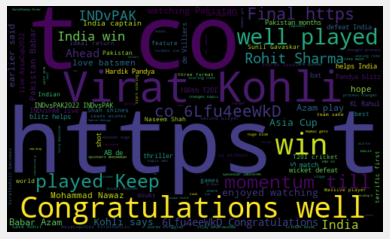

In [ ]:
#plot the wordCloud
allWords=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21).generate(allWords)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Create a function to compute the negative ,neutral and positive analysis
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'positive'


df['Analysis']=df['Polarity'].apply(getAnalysis)

#show the dataframe
df

,Tweets,subjectivity,Polarity,Analysis
0,: Congratulations ..well played.. Keep the mom...,0.700,0.400000,positive
1,"Sunil Gavaskar questions Rohit Sharma, Virat K...",0.500,-0.500000,Negative
2,: Congratulations ..well played.. Keep the mom...,0.700,0.400000,positive
3,: Congratulations ..well played.. Keep the mom...,0.700,0.400000,positive
4,: Congratulations ..well played.. Keep the mom...,0.700,0.400000,positive
...,...,...,...,...
95,": ""When you start scoring runs, the thought pr...",0.000,0.000000,Neutral
96,"""When you start scoring runs, the thought proc...",0.000,0.000000,Neutral
97,: Virat Kohli says he enjoyed watching Pakista...,0.575,0.284091,positive
98,Asia Cup 2022: AB de Villiers Wishes Virat Koh...,0.000,0.000000,Neutral


In [ ]:
#print all of the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='positive'):
    print(str(j)+') '+sortedDF['Tweets'][i])
    print()
    j=j+1

1) : Congratulations ..well played.. Keep the momentum till you win the Final 🙂👋
https://t.co/6Lfu4eeWkD

2) : Congratulations ..well played.. Keep the momentum till you win the Final 🙂👋
https://t.co/6Lfu4eeWkD

3) : Congratulations ..well played.. Keep the momentum till you win the Final 🙂👋
https://t.co/6Lfu4eeWkD

4) : Congratulations ..well played.. Keep the momentum till you win the Final 🙂👋
https://t.co/6Lfu4eeWkD

5) : INDvsPAK2022 INDvsPAK live
AsiaCup2022 HardikPandya
Former India captain Virat Kohli has registered a new drop in his…

6) INDvsPAK2022 INDvsPAK live
AsiaCup2022 HardikPandya
Former India captain Virat Kohli has registered a new drop… https://t.co/0HokvQY5tw

7) INDvsPAK2022 INDvsPAK live
AsiaCup2022 HardikPandya
Former India captain Virat Kohli has registered a new drop… https://t.co/15QLt8MJ2s

8) : INDvsPAK2022 INDvsPAK live
AsiaCup2022
MS Dhoni, Virat Kohli and Rohit Sharma share this unique record
https://t.co/S3Y…

9) INDvsPAK2022 INDvsPAK live
AsiaCup2022
MS

In [ ]:
#print all the negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+') '+sortedDF['Tweets'][i])
    print()
    j=j+1

1) Sunil Gavaskar questions Rohit Sharma, Virat Kohli’s shot selection vs Pakistan – Both got out to forgettable shots… https://t.co/iQ8sDLfv58

2) Vijay Deverakonda hopes ‘Virat Kohli will hit a half century at least’ as he attends INDvPAK match. See pics https://t.co/C44OaunLU2

3) KRK blames Anushka Sharma for Virat Kohli’s ‘depression’ in deleted tweet, Twitter is ‘disgusted’ https://t.co/exqMj3lcVV

4) Vijay Deverakonda hopes Virat Kohli will hit at least a 50 today as attends India vs Pakistan match in Dubai https://t.co/r0TvqoW5MA

5) Liger star Vijay Deverakonda turns presenter, hopes Virat Kohli ‘will hit at least a 50’ https://t.co/sn6P73DGqJ

6) Virat Kohli T20I Record vs Pakistan: Check Indian Batsman‘s Highest Score and Other Stats Against Arch-Rivals Ahead… https://t.co/Q4JcQTz23n



Text(0, 0.5, 'subjectivity')

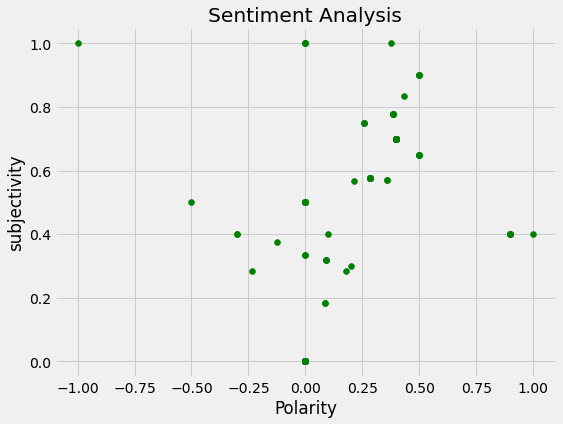

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['subjectivity'][i],color='green')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('subjectivity')


In [ ]:
#get the percentage of positive tweets
ptweets=df[df.Analysis=='positive']
ptweets=ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)

63.0

In [ ]:
#get the percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweets']

round( (ntweets.shape[0]/df.shape[0]*100),1)

6.0

In [ ]:
#get the percentage of neutral tweets
ntweets=df[df.Analysis=='Neutral']
ntweets=ntweets['Tweets']

round( (ntweets.shape[0]/df.shape[0]*100),1)

31.0

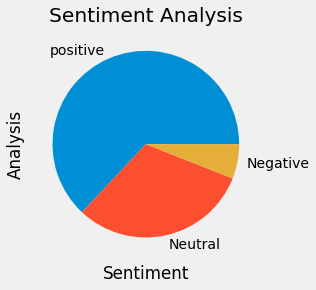

In [ ]:
#plot and visualize the counts(PIE CHART)
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()


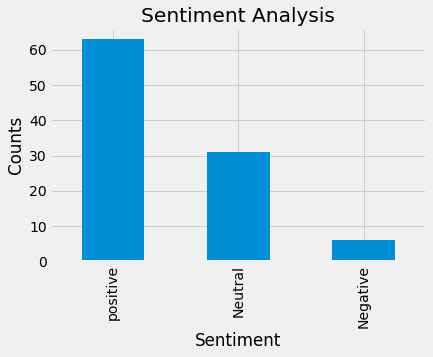

In [ ]:
#plot and visualize the counts(BAR GRAPH)
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()